# 2주차, 5일차 : 오버피팅과 언더피팅, 데이터 로드, 모델 저장 및 복원 코드 작성 손에 익을 때까지 암기

- ### Contents 
    1. Overfit And Underfit : https://www.tensorflow.org/tutorials/keras/overfit_and_underfit
    2. Load CSV Data : https://www.tensorflow.org/tutorials/load_data/csv
    3. TFRecord and tf.Example : https://www.tensorflow.org/tutorials/load_data/tfrecord
    4. Save and load models : https://www.tensorflow.org/tutorials/keras/save_and_restore_models

## 1. Overfit And Underfit (1/3)

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# !pip install tensorflow-gpu==2.0.0

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


In [2]:
# IMDB 데이터셋 다운로드
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

# 멀티-핫 인코딩은 정수 시퀀스를 0과 1로 이루어진 벡터로 변환합니다.
def multi_hot_sequences(sequences, dimension):
    # 0으로 채워진 (len(sequences), dimension) 크기의 행렬을 만든다.
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0 # results[i]의 특정 인덱스만 1로 설정.
    return results

train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

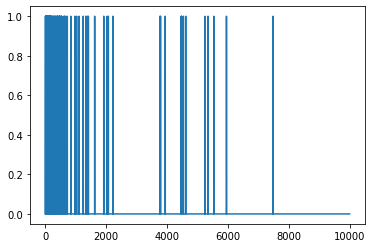

In [3]:
plt.plot(train_data[0])

In [4]:
train_data[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [5]:
# 기준 모델 만들기
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1,  activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [6]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 2s - loss: 0.4944 - accuracy: 0.8052 - binary_crossentropy: 0.4944 - val_loss: 0.3448 - val_accuracy: 0.8728 - val_binary_crossentropy: 0.3448
Epoch 2/20
25000/25000 - 1s - loss: 0.2572 - accuracy: 0.9079 - binary_crossentropy: 0.2572 - val_loss: 0.2910 - val_accuracy: 0.8841 - val_binary_crossentropy: 0.2910
Epoch 3/20
25000/25000 - 1s - loss: 0.1890 - accuracy: 0.9340 - binary_crossentropy: 0.1890 - val_loss: 0.2864 - val_accuracy: 0.8871 - val_binary_crossentropy: 0.2864
Epoch 4/20
25000/25000 - 1s - loss: 0.1525 - accuracy: 0.9480 - binary_crossentropy: 0.1525 - val_loss: 0.3111 - val_accuracy: 0.8782 - val_binary_crossentropy: 0.3111
Epoch 5/20
25000/25000 - 1s - loss: 0.1263 - accuracy: 0.9585 - binary_crossentropy: 0.1263 - val_loss: 0.3275 - val_accuracy: 0.8788 - val_binary_crossentropy: 0.3275
Epoch 6/20
25000/25000 - 1s - loss: 0.1081 - accuracy: 0.9657 - binary_crossentropy: 0.1081 - val_loss: 0.3585

In [8]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])
smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [9]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 1s - loss: 0.6066 - accuracy: 0.6669 - binary_crossentropy: 0.6066 - val_loss: 0.5470 - val_accuracy: 0.7461 - val_binary_crossentropy: 0.5470
Epoch 2/20
25000/25000 - 1s - loss: 0.4966 - accuracy: 0.8364 - binary_crossentropy: 0.4966 - val_loss: 0.4924 - val_accuracy: 0.8344 - val_binary_crossentropy: 0.4924
Epoch 3/20
25000/25000 - 1s - loss: 0.4447 - accuracy: 0.8878 - binary_crossentropy: 0.4447 - val_loss: 0.4659 - val_accuracy: 0.8583 - val_binary_crossentropy: 0.4659
Epoch 4/20
25000/25000 - 1s - loss: 0.4097 - accuracy: 0.9131 - binary_crossentropy: 0.4097 - val_loss: 0.4518 - val_accuracy: 0.8621 - val_binary_crossentropy: 0.4518
Epoch 5/20
25000/25000 - 1s - loss: 0.3816 - accuracy: 0.9316 - binary_crossentropy: 0.3816 - val_loss: 0.4461 - val_accuracy: 0.8625 - val_binary_crossentropy: 0.4461
Epoch 6/20
25000/25000 - 1s - loss: 0.3589 - accuracy: 0.9424 - binary_crossentropy: 0.3589 - val_loss: 0.4419

In [10]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy', 'binary_crossentropy'])

bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [11]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 2s - loss: 0.3503 - accuracy: 0.8453 - binary_crossentropy: 0.3503 - val_loss: 0.2966 - val_accuracy: 0.8777 - val_binary_crossentropy: 0.2966
Epoch 2/20
25000/25000 - 1s - loss: 0.1465 - accuracy: 0.9462 - binary_crossentropy: 0.1465 - val_loss: 0.3397 - val_accuracy: 0.8748 - val_binary_crossentropy: 0.3397
Epoch 3/20
25000/25000 - 1s - loss: 0.0520 - accuracy: 0.9841 - binary_crossentropy: 0.0520 - val_loss: 0.4428 - val_accuracy: 0.8668 - val_binary_crossentropy: 0.4428
Epoch 4/20
25000/25000 - 1s - loss: 0.0078 - accuracy: 0.9989 - binary_crossentropy: 0.0078 - val_loss: 0.5863 - val_accuracy: 0.8664 - val_binary_crossentropy: 0.5863
Epoch 5/20
25000/25000 - 1s - loss: 0.0018 - accuracy: 0.9999 - binary_crossentropy: 0.0018 - val_loss: 0.6575 - val_accuracy: 0.8688 - val_binary_crossentropy: 0.6575
Epoch 6/20
25000/25000 - 1s - loss: 3.3086e-04 - accuracy: 1.0000 - binary_crossentropy: 3.3086e-04 - val_loss

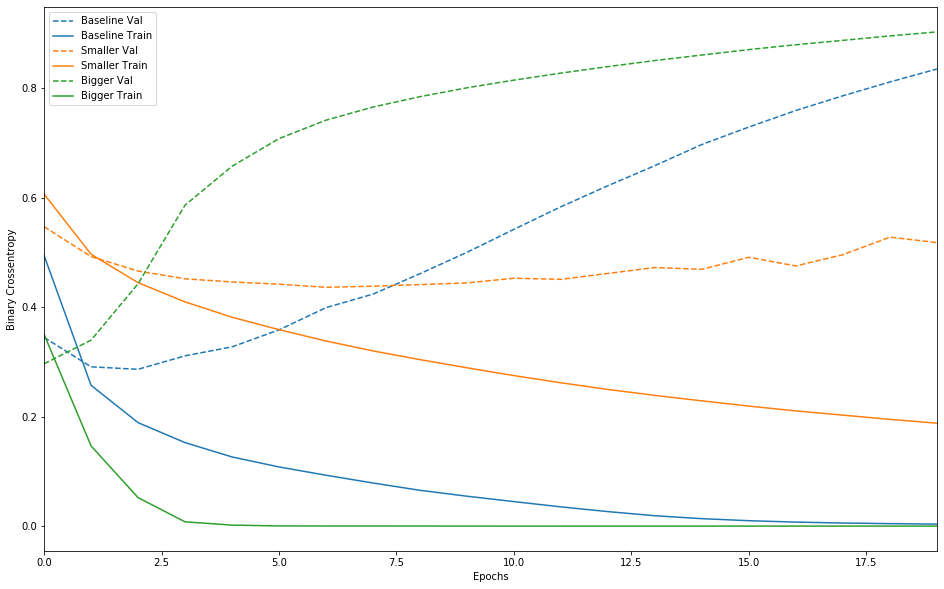

In [13]:
# 훈련 손실과 검증 손실 그래프 그리기
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16, 10))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                      '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                 label=name.title()+' Train')
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()
    
    plt.xlim([0, max(history.epoch)])

plot_history([('baseline', baseline_history),
             ('smaller', smaller_history),
             ('bigger', bigger_history)])

In [15]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.0001),
                      activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.0001),
                      activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 1s - loss: 0.4921 - accuracy: 0.8023 - binary_crossentropy: 0.4872 - val_loss: 0.3404 - val_accuracy: 0.8775 - val_binary_crossentropy: 0.3347
Epoch 2/20
25000/25000 - 1s - loss: 0.2548 - accuracy: 0.9108 - binary_crossentropy: 0.2481 - val_loss: 0.2912 - val_accuracy: 0.8869 - val_binary_crossentropy: 0.2836
Epoch 3/20
25000/25000 - 1s - loss: 0.1916 - accuracy: 0.9368 - binary_crossentropy: 0.1831 - val_loss: 0.3091 - val_accuracy: 0.8807 - val_binary_crossentropy: 0.2997
Epoch 4/20
25000/25000 - 1s - loss: 0.1582 - accuracy: 0.9505 - binary_crossentropy: 0.1479 - val_loss: 0.3209 - val_accuracy: 0.8798 - val_binary_crossentropy: 0.3098
Epoch 5/20
25000/25000 - 1s - loss: 0.1346 - accuracy: 0.9588 - binary_crossentropy: 0.1227 - val_loss: 0.3494 - val_accuracy: 0.8743 - val_binary_crossentropy: 0.3367
Epoch 6/20
25000/25000 - 1s - loss: 0.1167 - accuracy: 0.9666 - binary_crossentropy: 0.1033 - val_loss: 0.3917

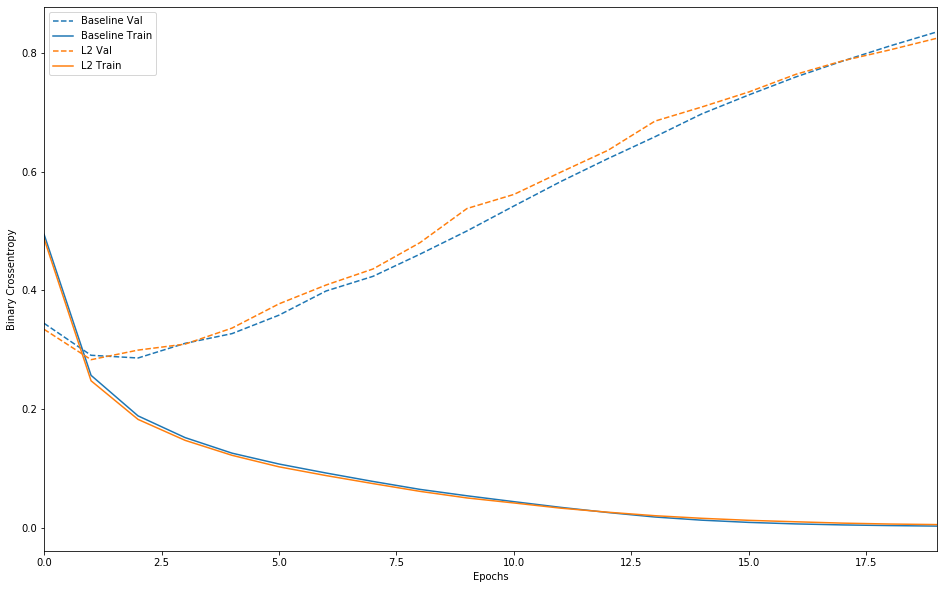

In [16]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [17]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy', 'binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                 epochs=20,
                                 batch_size=512,
                                 validation_data=[test_data, test_labels]
                                verbose=2)

SyntaxError: invalid syntax (<ipython-input-17-ebd688285bcc>, line 17)